# K Means Clustering
## Suryakumar P 21MIS1146

### Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Importing the dataset

In [5]:
df = pd.read_csv('Country-data.csv')

In [7]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [11]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [13]:
df2 = df.drop('country', axis=1)
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### Preprocessing the data
Since the values have wide range we are scaling the data

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df2)
scaled_df[:5]

array([[ 1.29153238, -1.13827979,  0.27908825, -0.08245496, -0.8082454 ,
         0.15733622, -1.61909203,  1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618,  0.07083669, -0.3753689 ,
        -0.31234747,  0.64786643, -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, -0.64176233, -0.22084447,
         0.78927429,  0.67042323, -0.0384044 , -0.46537561],
       [ 2.00780766,  0.77538117, -1.44807093, -0.16531531, -0.58504345,
         1.38705353, -1.17923442,  2.12815103, -0.51626829],
       [-0.69563412,  0.1606679 , -0.28689415,  0.4975675 ,  0.10173177,
        -0.60174853,  0.70425843, -0.54194633, -0.04181713]])

### Finding the best k value using Elbow method

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init= 10,max_iter= 300,random_state= 30 )
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

wcss

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.3229986404375,
 631.856378842423,
 576.2522226312212,
 517.8546860478073,
 451.42376594832496,
 422.7420198526205,
 397.3936159352459]

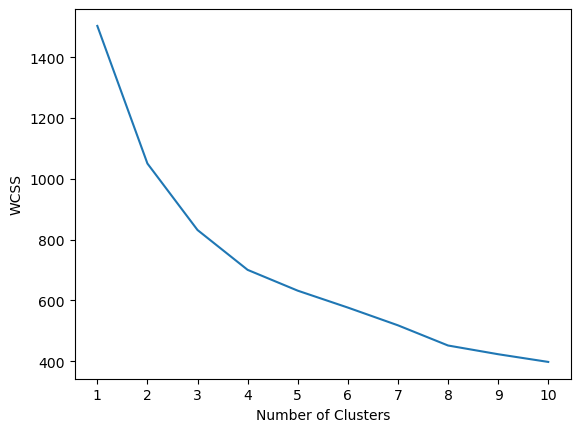

In [25]:
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [29]:
%pip install kneed --quiet
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing" )

kl.elbow

Note: you may need to restart the kernel to use updated packages.


4

##### The elbow point of the model is at 4. 

### Finding the best k value using Silhouette Coefficient

In [33]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init= 10,max_iter= 300,random_state= 30 )
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients

[0.28735668921406704,
 0.28329575683463126,
 0.301375962376881,
 0.2201207388855572,
 0.2396100192401505,
 0.19624986321318005,
 0.24192306216129358,
 0.23483634809306497,
 0.20524686132674516]

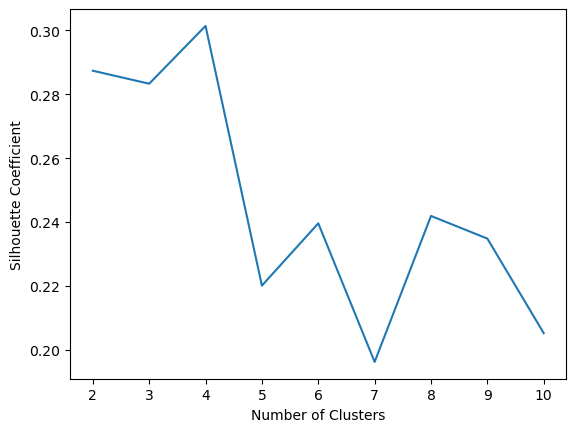

In [35]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

##### Inferring from the silhouette coefficient graph the best k-value is 4, because it has the highest silhouette coefficient. 

### Defining the model using the k-value found

In [39]:
kmeans = KMeans(init="k-means++",n_clusters=4,n_init=10,max_iter=300,random_state=30)
kmeans.fit(scaled_df)

KMeans(n_clusters=4, n_init=10, random_state=30)

##### The number of clusters is set to 4 as we found it shows the best result according to both the elbow method and the silhouette coefficient

In [42]:
kmeans.n_iter_

6

In [44]:
kmeans.cluster_centers_

array([[ 1.36021776, -0.43753313, -0.15598401, -0.18920377, -0.68689408,
         0.40211078, -1.28217981,  1.36494385, -0.60424243],
       [-0.41982697,  0.00664849, -0.21172363,  0.04758146, -0.21727424,
        -0.03495325,  0.26841956, -0.43822217, -0.33080531],
       [-0.84900324,  4.93567278, -0.00816303,  4.54805768,  2.4395424 ,
        -0.50420614,  1.22682431, -1.03886271,  2.44079735],
       [-0.82860929,  0.17262066,  0.85918977, -0.29637276,  1.46227512,
        -0.47818851,  1.10764922, -0.76368146,  1.66190214]])

In [46]:
kmeans.inertia_

700.3229986404375

#### Within Cluster Sum of Squares(WCSS) for the model with k = 4 is 700.322
